In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas numpy scipy scikit-learn seaborn

# Bootstrap Summary, Confidence Interval

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, sem, t
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/home/pnx/Documents/sp_env/sp_data_analysis - bootstrap-summary.csv')

df

,bootstrap,wasserstein,kl,rmse,mae,dataset,model
0,0,0.162467,13.265153,0.247458,0.190663,electricity,TimeGAN
1,1,0.159631,13.249368,0.245033,0.188280,electricity,TimeGAN
2,2,0.161048,13.285230,0.245518,0.189367,electricity,TimeGAN
3,3,0.161132,13.244357,0.246220,0.189455,electricity,TimeGAN
4,4,0.160812,13.236803,0.247543,0.189303,electricity,TimeGAN
...,...,...,...,...,...,...,...
130,10,0.125907,3.051074,0.301214,0.198281,weather,VRNNGAN
131,11,0.129025,3.080680,0.308106,0.201604,weather,VRNNGAN
132,12,0.126681,3.064443,0.303058,0.199316,weather,VRNNGAN
133,13,0.130373,3.104767,0.301026,0.197527,weather,VRNNGAN


In [13]:
metrics = ['kl', 'wasserstein', 'rmse', 'mae']
models = ['TimeGAN', 'TimeVAE', 'VRNNGAN']

print("Available datasets:", df['dataset'].unique())
datasets = df['dataset'].unique()

Available datasets: ['electricity' 'exchange' 'weather']


In [16]:
def calculate_bootstrap_stats(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    min_val = np.min(data)
    max_val = np.max(data)

    #Calculate 95% CI
    alpha = 1 - confidence
    std_err = sem(data)
    t_crit = t.ppf(1 - alpha/2, df=n-1)
    margin_of_error = t_crit * std_err

    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error

    return {
        'Mean': f"{mean:.4f}",
        'Std Dev': f"{std_dev:.4f}",
        'Range': f"[{min_val:.4f}, {max_val:.4f}]",
        '95% CI': f"[{ci_lower:.4f}, {ci_upper:.4f}]"
    }

In [17]:
for dataset in datasets:
    print(f"\n{'='*60}")
    print(f"BOOTSTRAP SUMMARY: {dataset.upper()} DATASET")
    print(f"{'='*60}")
    
    # Filter data for current dataset
    dataset_df = df[df['dataset'] == dataset]
    
    # Initialize results list
    results = []
    
    # Calculate statistics for each metric-model combination
    for metric in metrics:
        for model in models:
            # Get data for this specific combination
            data = dataset_df[dataset_df['model'] == model][metric].values
            
            if len(data) > 0:  # Make sure we have data
                stats = calculate_bootstrap_stats(data)
                
                result_row = {
                    'Metric': metric.upper(),
                    'Model': model,
                    'Mean': stats['Mean'],
                    'Std Dev': stats['Std Dev'],
                    'Range': stats['Range'],
                    '95% CI': stats['95% CI']
                }
                results.append(result_row)
    
    # Create DataFrame for this dataset
    summary_df = pd.DataFrame(results)
    
    # Display the results
    print(f"\nBootstrap Summary for {dataset.title()} Dataset:")
    print("-" * 80)
    print(summary_df.to_string(index=False))
    
    # Store in a dictionary if you want to access later
    if 'bootstrap_summaries' not in locals():
        bootstrap_summaries = {}
    bootstrap_summaries[dataset] = summary_df

print(f"\n{'='*60}")
print("ALL BOOTSTRAP SUMMARIES COMPLETE")
print(f"{'='*60}")


BOOTSTRAP SUMMARY: ELECTRICITY DATASET

Bootstrap Summary for Electricity Dataset:
--------------------------------------------------------------------------------
     Metric   Model    Mean Std Dev              Range             95% CI
         KL TimeGAN 13.2683  0.0308 [13.2178, 13.3256] [13.2512, 13.2853]
         KL TimeVAE 13.6202  0.0426 [13.5559, 13.6903] [13.5966, 13.6438]
         KL VRNNGAN  0.8833  0.0138   [0.8593, 0.9084]   [0.8756, 0.8909]
WASSERSTEIN TimeGAN  0.1605  0.0010   [0.1586, 0.1625]   [0.1599, 0.1610]
WASSERSTEIN TimeVAE  0.1016  0.0013   [0.0987, 0.1035]   [0.1009, 0.1022]
WASSERSTEIN VRNNGAN  0.1252  0.0010   [0.1232, 0.1270]   [0.1247, 0.1258]
       RMSE TimeGAN  0.2452  0.0014   [0.2426, 0.2475]   [0.2445, 0.2460]
       RMSE TimeVAE  0.2057  0.0010   [0.2035, 0.2072]   [0.2052, 0.2063]
       RMSE VRNNGAN  0.1864  0.0017   [0.1829, 0.1891]   [0.1855, 0.1873]
        MAE TimeGAN  0.1887  0.0010   [0.1868, 0.1907]   [0.1882, 0.1893]
        MAE TimeVAE  

In [19]:
# Confidence Interval calculation (95%) for each metric/model
ci_results = []

confidence = 0.95
alpha = 1 - confidence

for metric in metrics:
    for model in models:
        data = df[df['model'] == model][metric].values
        n = len(data)
        mean = np.mean(data)
        std_err = sem(data)  # standard error of the mean

        # t critical value for two-tailed
        t_crit = t.ppf(1 - alpha/2, df=n-1)

        margin_of_error = t_crit * std_err

        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error

        ci_results.append({
            'Metric': metric,
            'Model': model,
            'Mean': mean,
            'CI Lower (95%)': ci_lower,
            'CI Upper (95%)': ci_upper
        })

ci_df = pd.DataFrame(ci_results)

print("\nConfidence Intervals (95%):")

ci_df


Confidence Intervals (95%):


,Metric,Model,Mean,CI Lower (95%),CI Upper (95%)
0,wasserstein,TimeGAN,0.148774,0.141864,0.155683
1,wasserstein,TimeVAE,0.148149,0.137860,0.158438
2,wasserstein,VRNNGAN,0.142361,0.135841,0.148881
3,kl,TimeGAN,13.155435,12.114941,14.195928
4,kl,TimeVAE,13.333727,12.501630,14.165824
5,kl,VRNNGAN,1.639857,1.331941,1.947773
6,rmse,TimeGAN,0.259065,0.239117,0.279012
7,rmse,TimeVAE,0.628650,0.454197,0.803103
8,rmse,VRNNGAN,0.220294,0.202271,0.238317
9,mae,TimeGAN,0.181120,0.172549,0.189691


# Shapely-based Analysis

In [20]:
# Shapely-based Analysis Implementation - CORRECTED VERSION

# Create a copy of the dataframe for normalization
df_normalized = df.copy()

# Metrics to normalize
metrics = ['wasserstein', 'kl', 'rmse', 'mae']

# Initialize scaler
scaler = MinMaxScaler()

# Normalize each metric to [0,1] scale
for metric in metrics:
    df_normalized[metric + '_norm'] = scaler.fit_transform(df_normalized[[metric]])

print("Normalized metrics summary:")
print(df_normalized[['model'] + [m + '_norm' for m in metrics]].groupby('model').mean())

# Step 2: Calculate aggregated performance scores using row-by-row approach
# Equal weights for all metrics (0.25 each)
weights = {'kl': 0.25, 'wasserstein': 0.25, 'mae': 0.25, 'rmse': 0.25}

# Calculate aggregated scores for each row
aggregated_scores = []

for index, row in df_normalized.iterrows():
    score = 0
    for metric, weight in weights.items():
        # For error metrics (lower is better), we use (1 - normalized_value)
        score += weight * (1 - row[metric + '_norm'])
    aggregated_scores.append(score)

# Add aggregated scores to dataframe
df_normalized['aggregated_score'] = aggregated_scores

print(f"\nAggregated scores range: [{min(aggregated_scores):.6f}, {max(aggregated_scores):.6f}]")
print("Aggregated scores by model:")
for model in df_normalized['model'].unique():
    model_scores = df_normalized[df_normalized['model'] == model]['aggregated_score']
    print(f"{model}: mean={model_scores.mean():.6f}, std={model_scores.std():.6f}")

# Step 3: Calculate mean scores per model using CORRECT model names
models_list = df_normalized['model'].unique()
print(f"\nAvailable models: {models_list}")

# Calculate means for each model group
model_means = {}
for model in models_list:
    model_data = df_normalized[df_normalized['model'] == model]['aggregated_score']
    model_means[model] = np.mean(model_data)
    print(f"{model} mean: {model_means[model]:.6f}")

# Extract individual model scores using CORRECT model names
v_empty = 0
v_timegan = model_means.get('TimeGAN', 0)  # This represents GAN
v_timevae = model_means.get('TimeVAE', 0)  # This represents VAE  
v_vrnngan = model_means.get('VRNNGAN', 0)  # This represents GAN-VAE hybrid

print(f"\nModel Performance Scores:")
print(f"v(∅) = {v_empty:.6f}")
print(f"v({{TimeGAN}}) = {v_timegan:.6f}")
print(f"v({{TimeVAE}}) = {v_timevae:.6f}")
print(f"v({{VRNNGAN}}) = {v_vrnngan:.6f}")

# Step 4: Shapely contribution calculations 
# Map to your theoretical framework: TimeGAN=GAN, TimeVAE=VAE, VRNNGAN=GAN-VAE
phi_timegan = 0.5 * (v_timegan - v_empty) + 0.5 * (v_vrnngan - v_timevae)
phi_timevae = 0.5 * (v_timevae - v_empty) + 0.5 * (v_vrnngan - v_timegan)
phi_vrnngan = v_vrnngan - v_empty

print(f"\nShapely Contributions:")
print(f"φ_TimeGAN (GAN component) = {phi_timegan:.6f}")
print(f"φ_TimeVAE (VAE component) = {phi_timevae:.6f}")
print(f"φ_VRNNGAN (Hybrid GAN-VAE) = {phi_vrnngan:.6f}")

# Step 5: Create summary DataFrame
shapely_results = pd.DataFrame({
    'Model': ['TimeGAN (GAN)', 'TimeVAE (VAE)', 'VRNNGAN (GAN-VAE)'],
    'Performance Score v(S)': [v_timegan, v_timevae, v_vrnngan],
    'Shapely Contribution φ': [phi_timegan, phi_timevae, phi_vrnngan]
})

print(f"\nShapely Analysis Summary:")
print(shapely_results)

# Step 6: Interpretation
best_model_idx = shapely_results['Shapely Contribution φ'].idxmax()
best_model = shapely_results.loc[best_model_idx, 'Model']
print(f"\nModel with highest Shapely contribution: {best_model}")
print(f"This model achieves the best balance between fidelity and usability.")

# Step 7: Enhanced Synergy Analysis
synergy_effect = v_vrnngan - (v_timegan + v_timevae)
print(f"\nSynergy Effect Analysis:")
print(f"VRNNGAN (hybrid) performance: {v_vrnngan:.6f}")
print(f"Sum of individual performances (TimeGAN + TimeVAE): {(v_timegan + v_timevae):.6f}")
print(f"Synergy effect: {synergy_effect:.6f}")

if abs(synergy_effect) < 1e-6:
    print("No synergy: The hybrid model performs exactly as the sum of its parts.")
elif synergy_effect > 0:
    print("Positive synergy: The hybrid model performs better than the sum of its parts.")
else:
    print("Negative synergy: The hybrid model performs worse than the sum of its parts.")

# Step 8: Detailed Analysis
print(f"\n=== DETAILED ANALYSIS ===")
print(f"Performance ranking (higher is better):")
sorted_results = shapely_results.sort_values('Performance Score v(S)', ascending=False)
for i, (idx, row) in enumerate(sorted_results.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['Performance Score v(S)']:.6f}")

print(f"\nShapely contribution ranking:")
sorted_shapely = shapely_results.sort_values('Shapely Contribution φ', ascending=False)
for i, (idx, row) in enumerate(sorted_shapely.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['Shapely Contribution φ']:.6f}")

Normalized metrics summary:
         wasserstein_norm   kl_norm  rmse_norm  mae_norm
model                                                   
TimeGAN          0.573773  0.739396   0.070348  0.078003
TimeVAE          0.566627  0.750118   0.348794  0.366407
VRNNGAN          0.500365  0.046937   0.041138  0.038221

Aggregated scores range: [0.180860, 0.923620]
Aggregated scores by model:
TimeGAN: mean=0.634620, std=0.039700
TimeVAE: mean=0.492014, std=0.235105
VRNNGAN: mean=0.843335, std=0.056441

Available models: ['TimeGAN' 'TimeVAE' 'VRNNGAN']
TimeGAN mean: 0.634620
TimeVAE mean: 0.492014
VRNNGAN mean: 0.843335

Model Performance Scores:
v(∅) = 0.000000
v({TimeGAN}) = 0.634620
v({TimeVAE}) = 0.492014
v({VRNNGAN}) = 0.843335

Shapely Contributions:
φ_TimeGAN (GAN component) = 0.492970
φ_TimeVAE (VAE component) = 0.350364
φ_VRNNGAN (Hybrid GAN-VAE) = 0.843335

Shapely Analysis Summary:
               Model  Performance Score v(S)  Shapely Contribution φ
0      TimeGAN (GAN)              

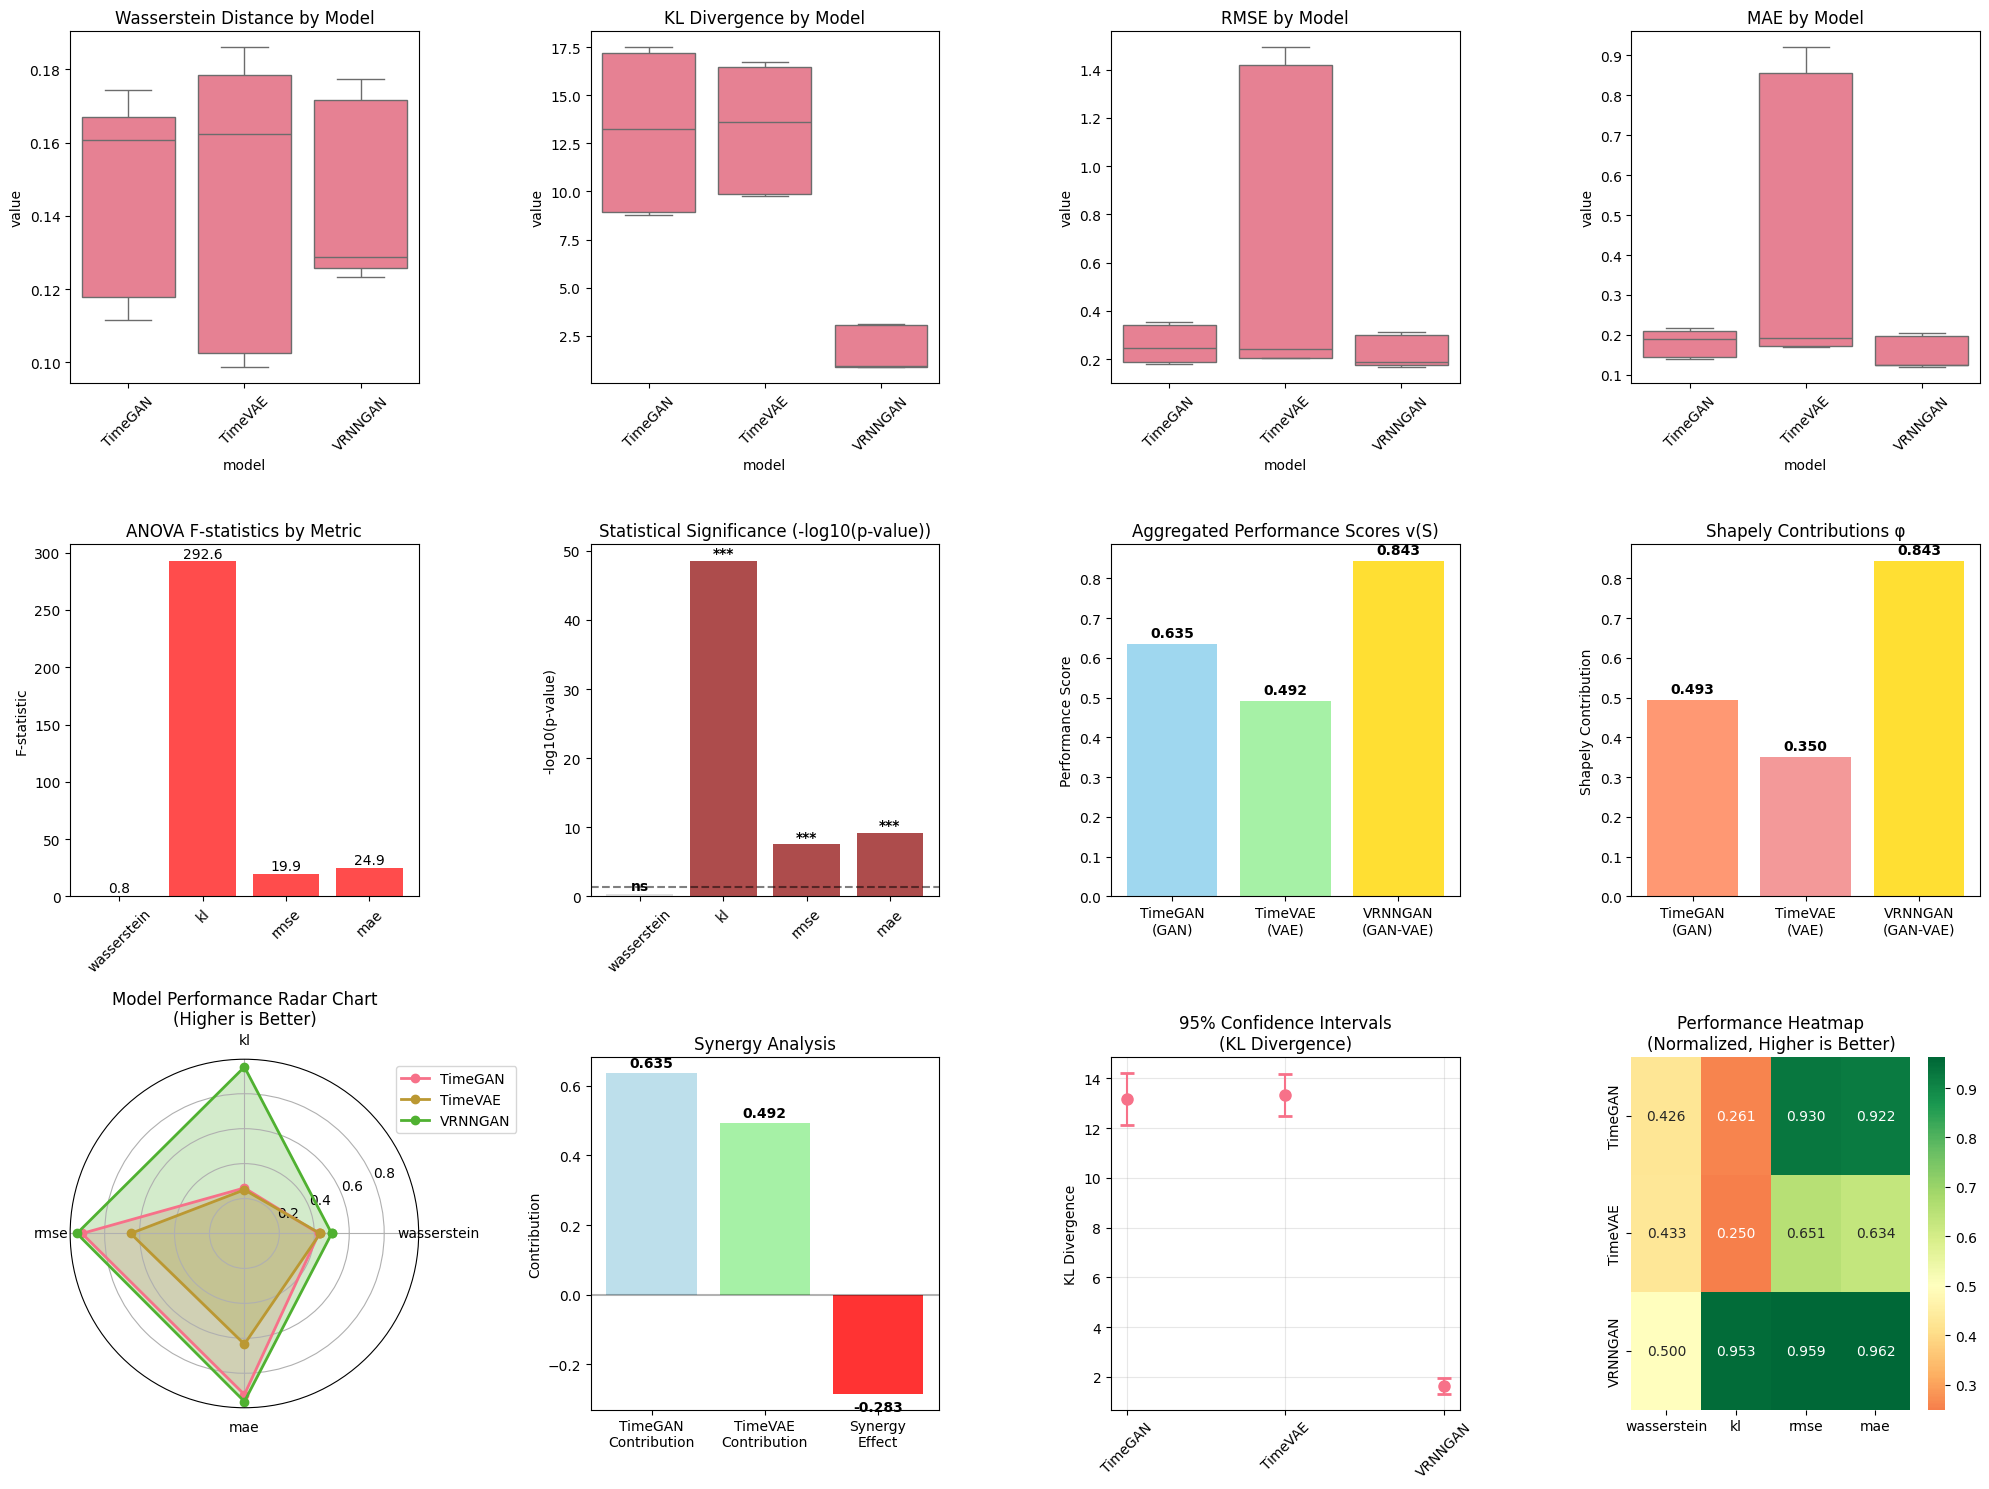

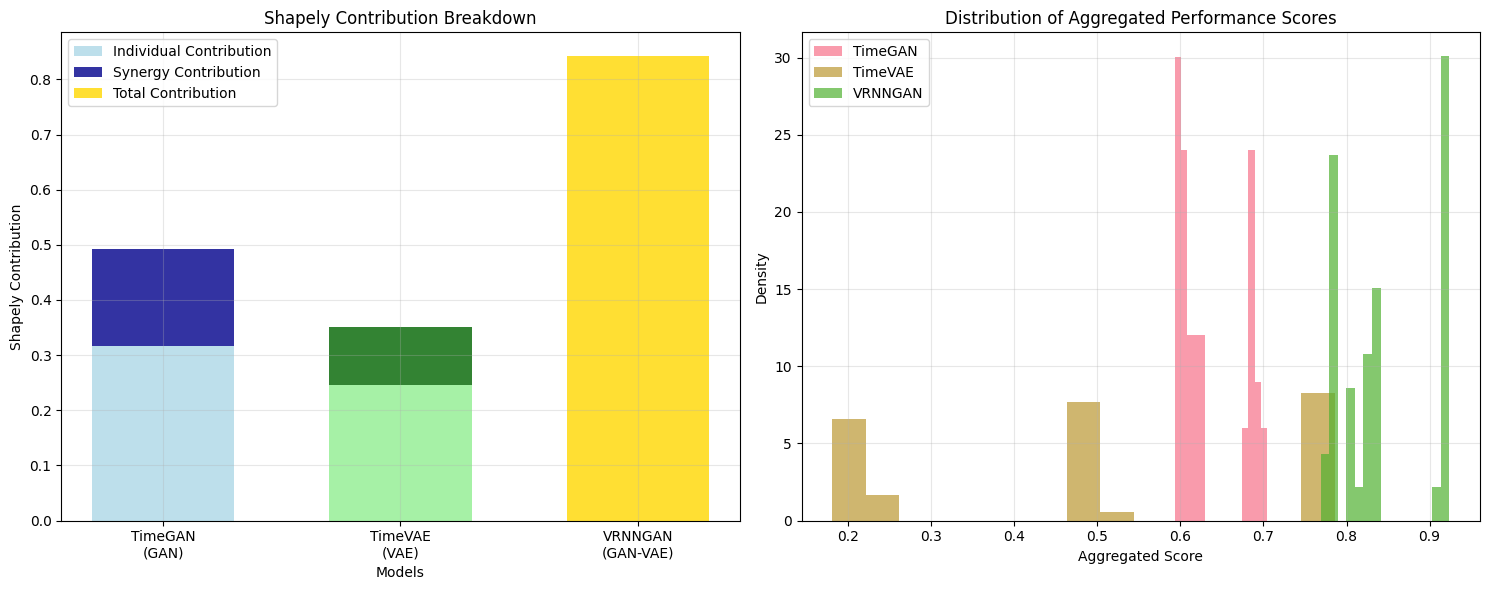


SUMMARY OF ANALYSES
Best performing model (highest aggregated score): VRNNGAN (0.8433)
Highest Shapely contribution: VRNNGAN (0.8433)
Synergy effect: -0.2833 (Negative)
Most significant metric differences (ANOVA): kl


In [21]:
# Data Visualization Section
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set_palette("husl")

# Set up the plotting area
fig = plt.figure(figsize=(20, 15))

# 1. Box plots for each metric by model (ANOVA visualization)
plt.subplot(3, 4, 1)
df_melted = df.melt(id_vars=['model'], value_vars=metrics, 
                   var_name='metric', value_name='value')
sns.boxplot(data=df_melted[df_melted['metric'] == 'wasserstein'], 
           x='model', y='value')
plt.title('Wasserstein Distance by Model')
plt.xticks(rotation=45)

plt.subplot(3, 4, 2)
sns.boxplot(data=df_melted[df_melted['metric'] == 'kl'], 
           x='model', y='value')
plt.title('KL Divergence by Model')
plt.xticks(rotation=45)

plt.subplot(3, 4, 3)
sns.boxplot(data=df_melted[df_melted['metric'] == 'rmse'], 
           x='model', y='value')
plt.title('RMSE by Model')
plt.xticks(rotation=45)

plt.subplot(3, 4, 4)
sns.boxplot(data=df_melted[df_melted['metric'] == 'mae'], 
           x='model', y='value')
plt.title('MAE by Model')
plt.xticks(rotation=45)

# 2. ANOVA F-statistics visualization
plt.subplot(3, 4, 5)
f_stats = [float(anova_results_df[anova_results_df['Metric'] == m]['F-statistic'].iloc[0]) 
          for m in metrics]
colors = ['red' if f > 10 else 'orange' if f > 5 else 'green' for f in f_stats]
bars = plt.bar(metrics, f_stats, color=colors, alpha=0.7)
plt.title('ANOVA F-statistics by Metric')
plt.ylabel('F-statistic')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{f_stats[i]:.1f}', ha='center', va='bottom')

# 3. P-values heatmap
plt.subplot(3, 4, 6)
p_values_numeric = [float(anova_results_df[anova_results_df['Metric'] == m]['P-value'].iloc[0]) 
                   for m in metrics]
significance = ['***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns' 
               for p in p_values_numeric]
colors_p = ['darkred' if p < 0.001 else 'red' if p < 0.01 else 'orange' if p < 0.05 else 'lightgray' 
           for p in p_values_numeric]
bars_p = plt.bar(metrics, [-np.log10(p) for p in p_values_numeric], color=colors_p, alpha=0.7)
plt.title('Statistical Significance (-log10(p-value))')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45)
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', alpha=0.5, label='p=0.05')
for i, (bar, sig) in enumerate(zip(bars_p, significance)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             sig, ha='center', va='bottom', fontweight='bold')

# 4. Aggregated performance scores
plt.subplot(3, 4, 7)
model_performance = [v_timegan, v_timevae, v_vrnngan]
model_names = ['TimeGAN\n(GAN)', 'TimeVAE\n(VAE)', 'VRNNGAN\n(GAN-VAE)']
colors_perf = ['skyblue', 'lightgreen', 'gold']
bars_perf = plt.bar(model_names, model_performance, color=colors_perf, alpha=0.8)
plt.title('Aggregated Performance Scores v(S)')
plt.ylabel('Performance Score')
for i, bar in enumerate(bars_perf):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{model_performance[i]:.3f}', ha='center', va='bottom', fontweight='bold')

# 5. Shapely contributions
plt.subplot(3, 4, 8)
shapely_values = [phi_timegan, phi_timevae, phi_vrnngan]
colors_shapely = ['coral', 'lightcoral', 'gold']
bars_shapely = plt.bar(model_names, shapely_values, color=colors_shapely, alpha=0.8)
plt.title('Shapely Contributions φ')
plt.ylabel('Shapely Contribution')
for i, bar in enumerate(bars_shapely):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{shapely_values[i]:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Radar chart for normalized metrics
plt.subplot(3, 4, 9, projection='polar')
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for i, model in enumerate(['TimeGAN', 'TimeVAE', 'VRNNGAN']):
    values = [1 - df_normalized[df_normalized['model'] == model][m + '_norm'].mean() 
             for m in metrics]
    values += values[:1]  # Complete the circle
    
    plt.plot(angles, values, 'o-', linewidth=2, label=model)
    plt.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], metrics)
plt.title('Model Performance Radar Chart\n(Higher is Better)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 7. Synergy analysis
plt.subplot(3, 4, 10)
synergy_components = [v_timegan, v_timevae, synergy_effect]
synergy_labels = ['TimeGAN\nContribution', 'TimeVAE\nContribution', 'Synergy\nEffect']
colors_syn = ['lightblue', 'lightgreen', 'red' if synergy_effect < 0 else 'orange']
bars_syn = plt.bar(synergy_labels, synergy_components, color=colors_syn, alpha=0.8)
plt.title('Synergy Analysis')
plt.ylabel('Contribution')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
for i, bar in enumerate(bars_syn):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01 if height >= 0 else height - 0.02,
             f'{synergy_components[i]:.3f}', ha='center', 
             va='bottom' if height >= 0 else 'top', fontweight='bold')

# 8. Confidence intervals visualization
plt.subplot(3, 4, 11)
# Create a more detailed CI plot for one metric (e.g., KL divergence)
kl_ci_data = ci_df[ci_df['Metric'] == 'kl'].copy()
models_ci = kl_ci_data['Model'].values
means_ci = kl_ci_data['Mean'].values
ci_lower = kl_ci_data['CI Lower (95%)'].values
ci_upper = kl_ci_data['CI Upper (95%)'].values

x_pos = np.arange(len(models_ci))
plt.errorbar(x_pos, means_ci, yerr=[means_ci - ci_lower, ci_upper - means_ci], 
            fmt='o', capsize=5, capthick=2, markersize=8)
plt.xticks(x_pos, models_ci, rotation=45)
plt.title('95% Confidence Intervals\n(KL Divergence)')
plt.ylabel('KL Divergence')
plt.grid(True, alpha=0.3)

# 9. Performance comparison matrix
plt.subplot(3, 4, 12)
# Create a heatmap of normalized performance
perf_matrix = np.array([[1-df_normalized[df_normalized['model'] == model][metric + '_norm'].mean() 
                        for metric in metrics] for model in ['TimeGAN', 'TimeVAE', 'VRNNGAN']])
sns.heatmap(perf_matrix, 
           xticklabels=metrics, 
           yticklabels=['TimeGAN', 'TimeVAE', 'VRNNGAN'],
           annot=True, fmt='.3f', cmap='RdYlGn', center=0.5)
plt.title('Performance Heatmap\n(Normalized, Higher is Better)')

plt.tight_layout()
plt.show()

# Additional standalone visualizations
# 10. Detailed Shapely contribution breakdown
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Shapely contributions with detailed breakdown
x = np.arange(len(model_names))
width = 0.6

# Calculate individual components of Shapely values
timegan_individual = 0.5 * (v_timegan - v_empty)
timegan_synergy = 0.5 * (v_vrnngan - v_timevae)
timevae_individual = 0.5 * (v_timevae - v_empty)
timevae_synergy = 0.5 * (v_vrnngan - v_timegan)

ax1.bar(x[0], timegan_individual, width, label='Individual Contribution', color='lightblue', alpha=0.8)
ax1.bar(x[0], timegan_synergy, width, bottom=timegan_individual, label='Synergy Contribution', color='darkblue', alpha=0.8)
ax1.bar(x[1], timevae_individual, width, color='lightgreen', alpha=0.8)
ax1.bar(x[1], timevae_synergy, width, bottom=timevae_individual, color='darkgreen', alpha=0.8)
ax1.bar(x[2], phi_vrnngan, width, color='gold', alpha=0.8, label='Total Contribution')

ax1.set_xlabel('Models')
ax1.set_ylabel('Shapely Contribution')
ax1.set_title('Shapely Contribution Breakdown')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Distribution of aggregated scores
for i, model in enumerate(['TimeGAN', 'TimeVAE', 'VRNNGAN']):
    model_scores = df_normalized[df_normalized['model'] == model]['aggregated_score']
    ax2.hist(model_scores, alpha=0.7, bins=15, label=model, density=True)

ax2.set_xlabel('Aggregated Score')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of Aggregated Performance Scores')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n" + "="*60)
print("SUMMARY OF ANALYSES")
print("="*60)
print(f"Best performing model (highest aggregated score): VRNNGAN ({v_vrnngan:.4f})")
print(f"Highest Shapely contribution: VRNNGAN ({phi_vrnngan:.4f})")
print(f"Synergy effect: {synergy_effect:.4f} ({'Positive' if synergy_effect > 0 else 'Negative' if synergy_effect < 0 else 'Neutral'})")
print(f"Most significant metric differences (ANOVA): {anova_results_df.loc[anova_results_df['F-statistic'].astype(float).idxmax(), 'Metric']}")
print("="*60)

In [2]:
# Bootstrap Analysis by Dataset
import pandas as pd
import numpy as np
from scipy.stats import t, sem

# Load the data
df = pd.read_csv('/home/pnx/Documents/sp_env/sp_data_analysis - bootstrap-summary.csv')

# Define metrics and models
metrics = ['kl', 'wasserstein', 'rmse', 'mae']
models = ['TimeGAN', 'TimeVAE', 'VRNNGAN']
datasets = ['electricity', 'exchange', 'weather']

# Metric name mapping for display
metric_names = {
    'kl': 'KL Divergence',
    'wasserstein': 'Wasserstein Distance', 
    'rmse': 'RMSE',
    'mae': 'MAE'
}

def calculate_bootstrap_stats(data, confidence=0.95):
    """Calculate bootstrap statistics for a given data series"""
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Sample standard deviation
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Calculate 95% confidence interval
    alpha = 1 - confidence
    std_err = sem(data)
    t_crit = t.ppf(1 - alpha/2, df=n-1)
    margin_of_error = t_crit * std_err
    
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    return {
        'Mean': mean,
        'Std Dev': std_dev,
        'Min': min_val,
        'Max': max_val,
        'CI Lower': ci_lower,
        'CI Upper': ci_upper,
        '95% CI': f"[{ci_lower:.3f}, {ci_upper:.3f}]"
    }

def create_bootstrap_summary_by_dataset(dataset_name):
    """Create bootstrap summary table for a specific dataset"""
    # Filter data for the specific dataset
    dataset_df = df[df['dataset'] == dataset_name].copy()
    
    # Initialize results list
    results = []
    
    # Calculate statistics for each model and metric combination
    for model in models:
        for metric in metrics:
            # Get data for this model-metric combination
            data = dataset_df[dataset_df['model'] == model][metric].values
            
            if len(data) > 0:  # Ensure we have data
                stats = calculate_bootstrap_stats(data)
                
                result_row = {
                    'Model': model,
                    'Metric': metric_names[metric],
                    'Mean': f"{stats['Mean']:.3f}",
                    'Std Dev': f"{stats['Std Dev']:.3f}",
                    'Min': f"{stats['Min']:.3f}",
                    'Max': f"{stats['Max']:.3f}",
                    '95% CI': stats['95% CI'],
                    'Range': f"[{stats['Min']:.3f}, {stats['Max']:.3f}]"
                }
                results.append(result_row)
    
    # Create DataFrame
    summary_df = pd.DataFrame(results)
    
    return summary_df

# Generate bootstrap summaries for each dataset
bootstrap_summaries = {}

for dataset in datasets:
    print(f"\n{'='*60}")
    print(f"BOOTSTRAP SUMMARY: {dataset.upper()} DATASET")
    print(f"{'='*60}")
    
    summary_df = create_bootstrap_summary_by_dataset(dataset)
    bootstrap_summaries[dataset] = summary_df
    
    # Display the summary
    print(f"\nBootstrap Summary Statistics: {dataset.title()} Dataset (15 runs per model)")
    print("-" * 80)
    
    # Create a nicely formatted display
    display_df = summary_df.copy()
    
    # Group by model for better readability
    for model in models:
        model_data = display_df[display_df['Model'] == model]
        if not model_data.empty:
            print(f"\n{model}:")
            for _, row in model_data.iterrows():
                print(f"  {row['Metric']:<20} | Mean: {row['Mean']:<8} | Std: {row['Std Dev']:<8} | CI: {row['95% CI']}")
    
    # Also display as a complete DataFrame for easy copying to LaTeX
    print(f"\n\nComplete DataFrame for {dataset.title()} Dataset:")
    print(summary_df.to_string(index=False))
    
    # Store for later use
    bootstrap_summaries[dataset] = summary_df

print(f"\n{'='*60}")
print("SUMMARY COMPLETE")
print(f"{'='*60}")
print(f"Generated bootstrap summaries for {len(datasets)} datasets:")
for dataset in datasets:
    print(f"- {dataset.title()}: {len(bootstrap_summaries[dataset])} model-metric combinations")


BOOTSTRAP SUMMARY: ELECTRICITY DATASET

Bootstrap Summary Statistics: Electricity Dataset (15 runs per model)
--------------------------------------------------------------------------------

TimeGAN:
  KL Divergence        | Mean: 13.268   | Std: 0.031    | CI: [13.251, 13.285]
  Wasserstein Distance | Mean: 0.160    | Std: 0.001    | CI: [0.160, 0.161]
  RMSE                 | Mean: 0.245    | Std: 0.001    | CI: [0.244, 0.246]
  MAE                  | Mean: 0.189    | Std: 0.001    | CI: [0.188, 0.189]

TimeVAE:
  KL Divergence        | Mean: 13.620   | Std: 0.043    | CI: [13.597, 13.644]
  Wasserstein Distance | Mean: 0.102    | Std: 0.001    | CI: [0.101, 0.102]
  RMSE                 | Mean: 0.206    | Std: 0.001    | CI: [0.205, 0.206]
  MAE                  | Mean: 0.170    | Std: 0.001    | CI: [0.170, 0.171]

VRNNGAN:
  KL Divergence        | Mean: 0.883    | Std: 0.014    | CI: [0.876, 0.891]
  Wasserstein Distance | Mean: 0.125    | Std: 0.001    | CI: [0.125, 0.126]
  RM

In [4]:
# Bootstrap Analysis by Dataset - Metric First Column
import pandas as pd
import numpy as np
from scipy.stats import t, sem

# Load the data
df = pd.read_csv('/home/pnx/Documents/sp_env/sp_data_analysis - bootstrap-summary.csv')

# Define metrics and models
metrics = ['kl', 'wasserstein', 'rmse', 'mae']
models = ['TimeGAN', 'TimeVAE', 'VRNNGAN']
datasets = ['electricity', 'exchange', 'weather']

# Metric name mapping for display
metric_names = {
    'kl': 'KL Divergence',
    'wasserstein': 'Wasserstein Distance', 
    'rmse': 'RMSE',
    'mae': 'MAE'
}

def calculate_bootstrap_stats(data, confidence=0.95):
    """Calculate bootstrap statistics for a given data series"""
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Sample standard deviation
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Calculate 95% confidence interval
    alpha = 1 - confidence
    std_err = sem(data)
    t_crit = t.ppf(1 - alpha/2, df=n-1)
    margin_of_error = t_crit * std_err
    
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    return {
        'Mean': mean,
        'Std Dev': std_dev,
        'Min': min_val,
        'Max': max_val,
        'CI Lower': ci_lower,
        'CI Upper': ci_upper,
        '95% CI': f"[{ci_lower:.3f}, {ci_upper:.3f}]"
    }

def create_bootstrap_summary_by_dataset(dataset_name):
    """Create bootstrap summary table for a specific dataset - METRIC FIRST COLUMN"""
    # Filter data for the specific dataset
    dataset_df = df[df['dataset'] == dataset_name].copy()
    
    # Initialize results list
    results = []
    
    # Calculate statistics for each METRIC and model combination (metric first!)
    for metric in metrics:  # METRIC LOOP FIRST
        for model in models:  # MODEL LOOP SECOND
            # Get data for this metric-model combination
            data = dataset_df[dataset_df['model'] == model][metric].values
            
            if len(data) > 0:  # Ensure we have data
                stats = calculate_bootstrap_stats(data)
                
                result_row = {
                    'Metric': metric_names[metric],  # METRIC FIRST COLUMN
                    'Model': model,                   # MODEL SECOND COLUMN
                    'Mean': f"{stats['Mean']:.3f}",
                    'Std Dev': f"{stats['Std Dev']:.3f}",
                    'Min': f"{stats['Min']:.3f}",
                    'Max': f"{stats['Max']:.3f}",
                    '95% CI': stats['95% CI'],
                    'Range': f"[{stats['Min']:.3f}, {stats['Max']:.3f}]"
                }
                results.append(result_row)
    
    # Create DataFrame with metric as first column
    summary_df = pd.DataFrame(results)
    
    return summary_df

# Generate bootstrap summaries for each dataset
bootstrap_summaries = {}

for dataset in datasets:
    print(f"\n{'='*70}")
    print(f"BOOTSTRAP SUMMARY: {dataset.upper()} DATASET (METRIC-FOCUSED)")
    print(f"{'='*70}")
    
    summary_df = create_bootstrap_summary_by_dataset(dataset)
    bootstrap_summaries[dataset] = summary_df
    
    # Display the summary grouped by metric
    print(f"\nBootstrap Summary Statistics: {dataset.title()} Dataset (15 runs per model)")
    print("-" * 85)
    
    # Group by metric for better readability (metric-focused view)
    for metric in metrics:
        metric_display_name = metric_names[metric]
        metric_data = summary_df[summary_df['Metric'] == metric_display_name]
        if not metric_data.empty:
            print(f"\n{metric_display_name}:")
            for _, row in metric_data.iterrows():
                print(f"  {row['Model']:<12} | Mean: {row['Mean']:<8} | Std: {row['Std Dev']:<8} | CI: {row['95% CI']}")
    
    # Display complete DataFrame for LaTeX table creation
    print(f"\n\nComplete DataFrame for {dataset.title()} Dataset (Metric First Column):")
    print("=" * 85)
    print(summary_df.to_string(index=False))
    
    # Store for later use
    bootstrap_summaries[dataset] = summary_df

print(f"\n{'='*70}")
print("BOOTSTRAP ANALYSIS COMPLETE - METRIC-FOCUSED FORMAT")
print(f"{'='*70}")
print(f"Generated bootstrap summaries for {len(datasets)} datasets:")
for dataset in datasets:
    print(f"- {dataset.title()}: {len(bootstrap_summaries[dataset])} metric-model combinations")

# Optional: Create a sample LaTeX table format for one dataset
print(f"\n{'='*70}")
print("SAMPLE LaTeX TABLE FORMAT (Exchange Dataset Example):")
print(f"{'='*70}")

if 'exchange' in bootstrap_summaries:
    sample_df = bootstrap_summaries['exchange']
    print("\\begin{table}[h!]")
    print("\\centering")
    print("\\caption{Bootstrap Summary Statistics: Exchange Dataset (15 runs per model)}")
    print("\\label{tab:bootstrap_exchange}")
    print("\\small")
    print("\\begin{tabular}{lccccc}")
    print("\\toprule")
    print("\\textbf{Metric} & \\textbf{Model} & \\textbf{Mean} & \\textbf{Std Dev} & \\textbf{95\\% CI} & \\textbf{Range} \\\\")
    print("\\midrule")
    
    current_metric = ""
    for _, row in sample_df.iterrows():
        if row['Metric'] != current_metric:
            if current_metric != "":
                print("\\midrule")
            current_metric = row['Metric']
            first_row = True
        
        if first_row:
            print(f"\\multirow{{3}}{{*}}{{{row['Metric']}}}")
            first_row = False
        
        print(f"    & {row['Model']} & {row['Mean']} & {row['Std Dev']} & {row['95% CI']} & {row['Range']} \\\\")
    
    print("\\bottomrule")
    print("\\end{tabular}")
    print("\\end{table}")


BOOTSTRAP SUMMARY: ELECTRICITY DATASET (METRIC-FOCUSED)

Bootstrap Summary Statistics: Electricity Dataset (15 runs per model)
-------------------------------------------------------------------------------------

KL Divergence:
  TimeGAN      | Mean: 13.268   | Std: 0.031    | CI: [13.251, 13.285]
  TimeVAE      | Mean: 13.620   | Std: 0.043    | CI: [13.597, 13.644]
  VRNNGAN      | Mean: 0.883    | Std: 0.014    | CI: [0.876, 0.891]

Wasserstein Distance:
  TimeGAN      | Mean: 0.160    | Std: 0.001    | CI: [0.160, 0.161]
  TimeVAE      | Mean: 0.102    | Std: 0.001    | CI: [0.101, 0.102]
  VRNNGAN      | Mean: 0.125    | Std: 0.001    | CI: [0.125, 0.126]

RMSE:
  TimeGAN      | Mean: 0.245    | Std: 0.001    | CI: [0.244, 0.246]
  TimeVAE      | Mean: 0.206    | Std: 0.001    | CI: [0.205, 0.206]
  VRNNGAN      | Mean: 0.186    | Std: 0.002    | CI: [0.186, 0.187]

MAE:
  TimeGAN      | Mean: 0.189    | Std: 0.001    | CI: [0.188, 0.189]
  TimeVAE      | Mean: 0.170    | Std: 0

In [7]:
bootstrap_summaries

{'electricity':                   Metric    Model    Mean Std Dev     Min     Max  \
 0          KL Divergence  TimeGAN  13.268   0.031  13.218  13.326   
 1          KL Divergence  TimeVAE  13.620   0.043  13.556  13.690   
 2          KL Divergence  VRNNGAN   0.883   0.014   0.859   0.908   
 3   Wasserstein Distance  TimeGAN   0.160   0.001   0.159   0.162   
 4   Wasserstein Distance  TimeVAE   0.102   0.001   0.099   0.103   
 5   Wasserstein Distance  VRNNGAN   0.125   0.001   0.123   0.127   
 6                   RMSE  TimeGAN   0.245   0.001   0.243   0.248   
 7                   RMSE  TimeVAE   0.206   0.001   0.204   0.207   
 8                   RMSE  VRNNGAN   0.186   0.002   0.183   0.189   
 9                    MAE  TimeGAN   0.189   0.001   0.187   0.191   
 10                   MAE  TimeVAE   0.170   0.001   0.169   0.172   
 11                   MAE  VRNNGAN   0.125   0.001   0.122   0.127   
 
               95% CI             Range  
 0   [13.251, 13.285]  [13.218,